In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import genfromtxt
import time
import math
import random

In [2]:
def pathLength(pathList):
    totalDistance = 0
    firstPoint_x = pathList[0,0]
    firstPoint_y = pathList[0,1]
    previousCity_x = firstPoint_x
    previousCity_y = firstPoint_y
    
    for partialDist in pathList:  
        currentCity_x = partialDist[0]
        currentCity_y = partialDist[1]
        totalDistance = totalDistance + math.sqrt((previousCity_x-currentCity_x)**2 + (previousCity_y-currentCity_y)**2) 
        previousCity_x = currentCity_x
        previousCity_y = currentCity_y            
                    
    totalDistance = totalDistance + math.sqrt((firstPoint_x-currentCity_x)**2 + (firstPoint_y-currentCity_y)**2) #np.linalg.norm(previousCity-firstPoint) #loops back around to the first point
    return totalDistance

In [3]:
cities_15 = genfromtxt('15cities.csv', delimiter=',')
cities_25 = genfromtxt('25cities.csv', delimiter=',')
cities_25A = genfromtxt('25cities_A.csv', delimiter=',')
cities_100 = genfromtxt('100cities.csv', delimiter=',')
testCities = genfromtxt('testcities.csv', delimiter=',')
testCities3 = genfromtxt('testcities3x3.csv', delimiter=',')

np.random.seed() #seed the random generator

#for i in range(10):
#simulatedAnnealing(cities_25A,100)
#randomPopulation(cities_15,3)

In [4]:
def randomSwap(pathList):
    randomPathIndex = np.random.choice(pathList.shape[0],2, replace=False)#picks 2 indicies at random, does not allow the same index to be called twice
    pathList[randomPathIndex[0],:], pathList[randomPathIndex[1],:] = pathList[randomPathIndex[1],:], pathList[randomPathIndex[0],:].copy()
    return pathList

0
1
2
6
7
12
80
81
236
481
4751
4942
4943
4944
7528
10534
19833
367687
367688
590516
616261


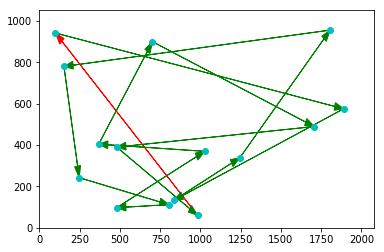

(46.079132080078125, 6425.489488401166, 22, 383740)


In [63]:
def simulatedAnnealing(citiesList, temperature):
    count = 0 #use this to update T
    newCount = 0
    solutionsGenerated = 1 #number of soultions generated, updates each time a new path is chosen
    startTime = time.time() #used to keep track opf run time
    T = temperature #temperature variable, may change over time
    bestPath = citiesList[1:,:] #just removes the first row since that is not a city
    np.random.shuffle(bestPath) # creates a random order of cities
    bestPathLength = pathLength(bestPath) #saves the current best path length, initial this is the first random path
    while T > 1:
        previousBestPath = bestPathLength
        pathTrial = randomSwap(bestPath) #conducts the city swap on the current best path
        newPathLength = pathLength(pathTrial) #calcutates the new path length of the random swap
        if newPathLength < bestPathLength:
            bestPath = pathTrial
            bestPathLength = newPathLength
            solutionsGenerated += 1
            T *= 0.99
            #tspPlot(bestPath)
        elif newPathLength > bestPathLength:
            pickingProb = np.exp(-(newPathLength-bestPathLength)/ T)
            if pickingProb >= np.random.uniform(0.0,1.0):
                bestPath = pathTrial
                bestPathLength = newPathLength
                solutionsGenerated += 1
                T *= 0.99
    
        
        if (previousBestPath != bestPathLength):
            newCount = count
            count +=1
            #print(newCount)
        elif(previousBestPath == bestPathLength):
            count +=1
    
        if count > 1000000:
                break
                
    totalTime = time.time() - startTime
    tspPlot(bestPath)
    return totalTime, bestPathLength, solutionsGenerated, newCount

for i in range(1):
    print(simulatedAnnealing(cities_15,100))
    

In [57]:
def tspPlot(bestPath):
    
    x = bestPath[:,0]
    y = bestPath[:,1]
    
    plt.plot(x,y, 'co')
    
    a_scale = float(max(x))/float(50)
    
    plt.arrow(x[-1],y[-1], (x[0] - x[-1]), (y[0] - y[-1]), head_width = a_scale, color ='r', length_includes_head = True)
    
    for i in range(0,len(x)-1):
        plt.arrow(x[i],y[i], (x[i+1] - x[i]), (y[i+1] - y[i]), head_width = a_scale, color ='g', length_includes_head = True)
    
    plt.xlim(-1,max(x)*1.1)
    plt.ylim(-1,max(y)*1.1)  
    plt.show()


In [ ]:
def evolutionAlgo(citiesList,numPop):  
    
    startTime = time.time() #used to keep track opf run time
    solutionsGenerated = 1
    bestPath = citiesList[1:,:] #just removes the first row since that is not a city
    #for paths in bestPath:        
    np.random.shuffle(bestPath) # creates a random order of cities
    bestPathLength = pathLength(bestPath) #saves the current best path length, initial this is the first random path
    
    nestedPopulations = []  
    
    for i in range(numPop): #generate random populations
        j = 0     
        mixingPopulation = bestPath
        np.random.shuffle(mixingPopulation)
        while j < mixingPopulation.shape[0]*numPop:
            mixingPopulation = randomSwap(mixingPopulation).copy()
            j += 1
        nestedPopulations.append(mixingPopulation.copy())
    
    count = 0
    bestSolutionProb = 0
    desiredProb = (1/numPop)*2
    while bestSolutionProb < desiredProb:

        #find the fitness of current populstions
        probDistList, probOfPopulation, bestSolutionProb, Fitness = fitness(nestedPopulations,numPop, desiredProb)
        #pick the winner
        #pickedWinner = nestedPopulations
        originalPop = nestedPopulations
        pickingProb = np.random.uniform(0.0,1.0) 
        
        for i in range(numPop):
            if i == 0:
                if pickingProb <= probDistList[i]:
                    #take the winner and mutate it but dont add it back to the pool until its compared                    
                    #need new fitness                 
                    for i in range(numPop):
                        pickedWinner = randomSwap(nestedPopulations[i].copy())
                        pickedWinnerFitness = pathLength(pickedWinner)
                        #originalFitness = pathLength(nestedPopulations[i])
                        #difference = pickedWinnerFitness-originalFitness
                        if(pickedWinnerFitness < pathLength(nestedPopulations[i])):
                            nestedPopulations[i] = pickedWinner
                            #tspPlot(nestedPopulations[i])
                            if pathLength(nestedPopulations[i]) < bestPathLength:
                                bestPathLength = pathLength(nestedPopulations[i])
                                #print(bestPathLength)
                            solutionsGenerated += 1
                            break
            else:
                if pickingProb > probDistList[i-1] and pickingProb <= probDistList[i]:
                    #take the winner and mutate it but dont add it back to the pool until its compared                    
                    #need new fitness                 
                    for i in range(numPop):
                        pickedWinner = randomSwap(nestedPopulations[i].copy())
                        pickedWinnerFitness = pathLength(pickedWinner)
                        #originalFitness = pathLength(nestedPopulations[i])
                        #difference = pickedWinnerFitness-originalFitness
                        if(pickedWinnerFitness < pathLength(nestedPopulations[i])):
                            nestedPopulations[i] = pickedWinner
                            #tspPlot(nestedPopulations[i])
                            if pathLength(nestedPopulations[i]) < bestPathLength:
                                bestPathLength = pathLength(nestedPopulations[i])
                                #print(bestPathLength)
                            solutionsGenerated += 1
                            break
        
        count +=1
        if count > 100000:
            break

    totalTime = time.time() - startTime
           
    return totalTime, bestPathLength, solutionsGenerated, count
    #for i in range(numPop):
    #    tspPlot(nestedPopulations[i])

    
evolutionAlgo(cities_25A,3) 

#evolutionAlgo(testCities3,3)

In [35]:
def fitness(populations, numPop, desiredProb):
        #calculate individual fitness fitness of populations
    nestedPopulations = populations
    fitness = []
    totalFitness = 0 #used to sum all the fitnesses
    for i in range(numPop):
        fitness.append(1 / pathLength(nestedPopulations[i]))
        totalFitness += fitness[i]
    
    #print(fitness)
    #find probablilties
    bestSolutionProb = 0
    probOfPopulation = []
    for i in range(numPop):
        probOfPopulation.append(fitness[i]/totalFitness)
        if(probOfPopulation[i]>=desiredProb):
            bestSolutionProb = probOfPopulation[i]
                
    #print(probOfPopulation)

    #pick on of the population
    probDistList = [] #will be used to creat a probabilty distribution of our probOfPopulation
    for i in range(numPop):
        if i == 0:
            probDistList.append(probOfPopulation[i]) #makes the first probabilty calulated the first of the list
        else:
            probDistList.append(probDistList[i-1] + probOfPopulation[i]) #adds up each probability, last value should equal 1
           
    return probDistList, probOfPopulation, bestSolutionProb, fitness


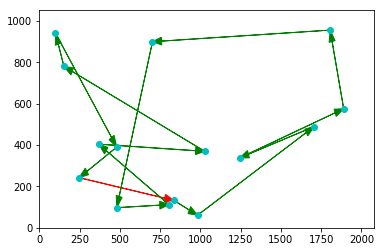

(44.085187911987305, 8698.888707193082, 289115, 1000000)


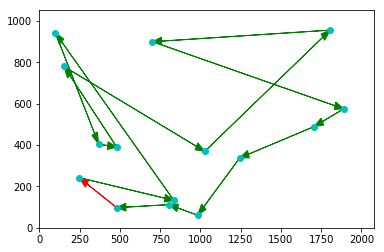

(44.83858895301819, 9049.387521016646, 288455, 1000000)


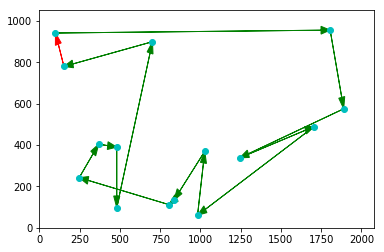

(45.02130150794983, 7515.000611440496, 287524, 1000000)


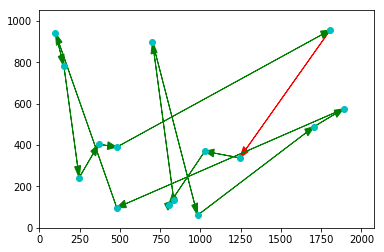

(44.23444986343384, 9033.034266877168, 286323, 1000000)


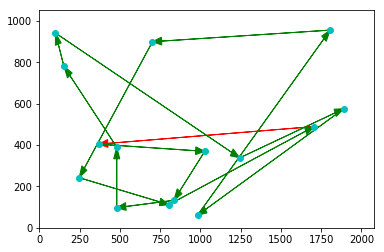

(44.166786670684814, 11335.081686208505, 287500, 1000000)


KeyboardInterrupt: 

In [54]:
def eGreedy(citiesList):
    count = 0 #use this to update T
    solutionsGenerated = 1 #number of soultions generated, updates each time a new path is chosen
    startTime = time.time() #used to keep track opf run time
    
    epsilon = 0.1
    
    bestPath = citiesList[1:,:] #just removes the first row since that is not a city
    np.random.shuffle(bestPath) # creates a random order of cities
    bestPathLength = pathLength(bestPath) #saves the current best path length, initial this is the first random path
    while count < 1000000:
        pathTrial = randomSwap(bestPath.copy()) #conducts the city swap on the current best path
        newPathLength = pathLength(pathTrial) #calcutates the new path length of the random swap
        if newPathLength < bestPathLength:
            bestPath = pathTrial
            bestPathLength = newPathLength
            solutionsGenerated += 1
            #tspPlot(bestPath)
        elif newPathLength > bestPathLength:
            if epsilon >= np.random.uniform(0.0,1.0):
                bestPath = pathTrial
                bestPathLength = newPathLength
                solutionsGenerated += 1

        count +=1

                
    totalTime = time.time() - startTime
    tspPlot(bestPath)
    return totalTime, bestPathLength, solutionsGenerated, count

for i in range(10):
    print(eGreedy(cities_15))